In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns

# Notes before starting: 
### Variants in the Experiment
Different wording
Different colors


### Business Value:
Improving user engagement
Increasing conversion rates
Understanding user psychology and interaction with website elements
Potentially increasing revenue by making the call-to-action more effective
Gathering insights about user preferences and behavior


### Main Metric for Success
The primary metric would be Click-Through Rate (CTR), which is currently at 2%. We want to measure how the new variants compare to the original button in terms of user clicks relative to total website visits.

### Additional Metrics to Track
Conversion rate
Time spent on subsequent pages after clicking
Bounce rate
User feedback/sentiment
Scroll depth
Interaction with other website elements

### Statistical Significance Threshold
95% significance level which is a standard practice in statistical hypothesis testing. 
Minimum Detectable Effect (MDE) = 20%

### Experiment Platform
Optimizely
VWO (Visual Website Optimizer)
Google Optimize
A/B Tasty

### Advantages of using external tools:
Quick implementation
No need for custom software development
Built-in statistical analysis
Easy tracking and reporting
Minimal engineering resources required

### Recommended Experimental Design Steps:

Design the variants based on user feedback
Set up A/B testing using an external platform
Ensure equal traffic distribution
Run the experiment for a statistically significant duration (likely 2-4 weeks)
Collect and analyze data
Draw conclusions based on the defined metrics and significance threshold

### Additional Considerations:
Ensure the sample size is large enough for statistical validity
Control for external factors (e.g., marketing campaigns, seasonal variations)
Prepare a follow-up plan based on experiment results

# Hypothesis testing: Chi-Square Test within the Eniac case study

In this notebook we perform a chi-square test with the data from the Eniac case study, applying a post-hoc correction to perform pairwise tests and find the true winner.

## 1.&nbsp;State the Null Hypothesis and the Alternative Hypothesis.


Null Hypothesis (H0): There is no statistically significant difference in CTR between the original button and the new variants.

Alternative Hypothesis (H1): At least one of the new variants demonstrates a statistically significant improvement in CTR compared to the original button.

## 2.&nbsp; Select an appropriate significance level alpha ($\alpha$).

It was decided that a relatively high alpha was acceptable in this case

In [27]:
# %95 confidence level 
alpha = 0.05

## 3.&nbsp; Collect data that is random and independent

The important pieces of information (clicks on each element of interest & visits on each page) are scattered around. Let's collect them. Where are the .csv files? 🥸

## Questions to answer:
What was the click-through rate for each version?\
Which version was the winner?\
Do the results seem conclusive?

In [106]:
#importing the data
version_a = pd.read_csv("eniac_a.csv")
version_b = pd.read_csv("eniac_b.csv")
version_c = pd.read_csv("eniac_c.csv")
version_d = pd.read_csv("eniac_d.csv")

In [17]:
# have a look at the firat two rows of snapshot info column
version_a["Snapshot information"].iloc[:2]

0    Homepage Version A - white SHOP NOW   •   http...
1    created 2021-09-14   •   14 days 0 hours 34 mi...
Name: Snapshot information, dtype: object

In [26]:
# extracting clicks and visits info from snapshot info column at row=1
value_a = version_a.at[1, 'Snapshot information']
value_b = version_b.at[1, 'Snapshot information']
value_c = version_c.at[1, 'Snapshot information']
value_d = version_d.at[1, 'Snapshot information']

print(f"Number of visits and clicks for version a is {value_a}")
print(f"Number of visits and clicks for version b is {value_b}")
print(f"Number of visits and clicks for version c is {value_c}")
print(f"Number of visits and clicks for version d is {value_d}")

Number of visits and clicks for version a is created 2021-09-14   •   14 days 0 hours 34 mins   •   25326 visits, 23174 clicks
Number of visits and clicks for version b is created 2021-10-27   •   14 days 0 hours 34 mins   •   24747 visits, 22407 clicks
Number of visits and clicks for version c is created 2021-10-27   •   14 days 0 hours 34 mins   •   24876 visits, 23031 clicks
Number of visits and clicks for version d is created 2021-10-27   •   14 days 0 hours 34 mins   •   25233 visits, 22743 clicks


In [107]:
# total visits of each version
total_visit = [25326, 24747, 24876, 25233]

In [86]:
#creating a list of total clicks 
# total_clicks = [(visible_a["No. clicks"].sum()), (visible_b["No. clicks"].sum()), (visible_c["No. clicks"].sum()), (visible_d["No. clicks"].sum())]
# total_clicks

[17912, 17285, 17963, 17461]

In [108]:
#creating a list of clicks on the test versions  
test_clicks = [(version_a["No. clicks"][version_a["Name"] == "SHOP NOW"].sum()), (version_b["No. clicks"][version_b["Name"] == "SHOP NOW"].sum()), (version_c["No. clicks"][version_c["Name"] == "SEE DEALS"].sum()), (version_d["No. clicks"][version_d["Name"] == "SEE DEALS"].sum())]
test_clicks 
     

[512, 281, 527, 193]

In [109]:
#creating a list of no clicks on the test versions 
test_no_clicks =  []
for item1, item2 in zip(total_visit, test_clicks):
  item = item1 - item2
  test_no_clicks.append(item)
test_no_clicks

[24814, 24466, 24349, 25040]

In [116]:
#observed results
test_no_clicks
test_clicks 

# Display the data in the form of a contingency table
observed = pd.DataFrame([test_clicks, test_no_clicks, total_visit],
                           columns = ["A", "B", "C", "D"],
                           index = ["Click", "Did not Click", "Total Visits"])
observed

,A,B,C,D
Click,512,281,527,193
Did not Click,24814,24466,24349,25040
Total Visits,25326,24747,24876,25233


In [140]:
#adding in click through rate 
observed.loc["Click Through Rate"] = ((observed.loc['Click'] / observed.loc['Total Visits']))
observed

,A,B,C,D
Click,512.000000,281.000000,527.000000,193.000000
Did not Click,24814.000000,24466.000000,24349.000000,25040.000000
Total Visits,25326.000000,24747.000000,24876.000000,25233.000000
Click Through Rate,0.020216,0.011355,0.021185,0.007649


In [129]:
# for the chi square test we need click, total click and total row and coluns
observed_results = pd.DataFrame([test_clicks, test_no_clicks],
                           columns = ["A", "B", "C", "D"],
                           index = ["Click", "Did not Click"])

# observed_2["Total"] = observed_2.sum(axis=1)
# observed_2.loc["Total"] = observed_2.sum(axis=0)

observed_results

,A,B,C,D
Click,512,281,527,193
Did not Click,24814,24466,24349,25040


## 4.&nbsp; Calculate the test result

In [130]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency

chisq, pvalue, df, expected = stats.chi2_contingency(observed_2)

In [131]:
print(f"chi square: {chisq}, p value: {pvalue}, degree of freedom: {df}")

chi square: 224.01877488058412, p value: 2.7161216607868712e-48, degree of freedom: 3


In [126]:
critical_value = 7.815

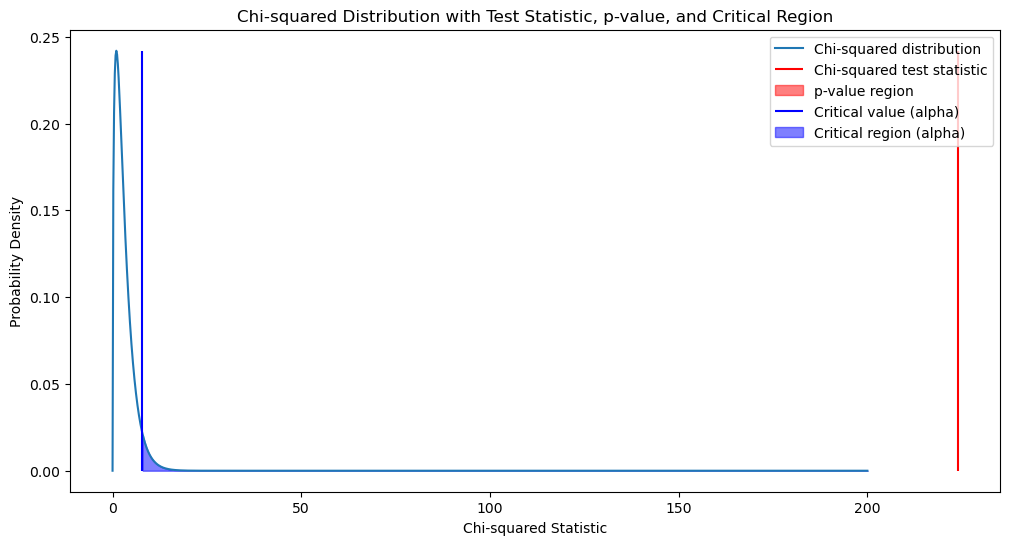

In [127]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

# Degrees of freedom and alpha level for the Chi-squared test
df = 3 
alpha = 0.05

# Generate an array of x values to represent the Chi-squared distribution range
xt = np.linspace(0, 200, 1000)

# Calculate the Chi-squared distribution for the given df
chi2_dist = stats.chi2.pdf(xt, df)

# Plotting
plt.figure(figsize=(12,6))

# Plot the Chi-squared distribution
plt.plot(xt, chi2_dist, label="Chi-squared distribution")

# Add a vertical line for the Chi-squared test statistic
plt.vlines(chisqr, ymin=0, ymax=max(chi2_dist), color="red", label="Chi-squared test statistic")

# Shade the region in the tails that is more extreme than the test statistic (p-value)
plt.fill_between(xt, chi2_dist, where=(xt > chisqr), color="r", alpha=0.5, label="p-value region")

# Add a vertical line for the critical value (alpha)
plt.vlines(critical_value, ymin=0, ymax=max(chi2_dist), color="blue", label="Critical value (alpha)")

# Shade the region under the curve that represents the critical region
plt.fill_between(xt, chi2_dist, where=(xt > critical_value), color="b", alpha=0.5, label="Critical region (alpha)")

# Add labels and title
plt.title("Chi-squared Distribution with Test Statistic, p-value, and Critical Region")
plt.xlabel("Chi-squared Statistic")
plt.ylabel("Probability Density")
plt.legend()

# Show the plot
plt.show()


## 5.&nbsp; Interpret the test result

In [128]:
if pvalue > alpha:
  print("Do not reject the null hypothesis")
else:
  print("Reject the null hypothesis")

Reject the null hypothesis


## How do we decide who's the winner?

This means that at least one of the four different versions performed significantly better or worse than the others.


> ** Post hoc tests, also known as post hoc comparisons or pairwise comparisons, are statistical procedures used in conjunction with a Chi-Squared test to determine specific differences between groups or conditions after obtaining significant results from the Chi-Squared test. Once the Chi-Squared test reveals a significant difference among the variables being examined, post hoc tests are employed to identify which specific groups or categories are significantly different from each other.

We have 6 possible dual tests to perform:
* Version A - Version B
* Version A - Version C
* Version A - Version D
* Version B - Version C
* Version B - Version D
* Version C - Version D

The level of alpha we selected for the chi-squared test cannot be same for the dual tests. If there was an error of 5% in each of the tests, this would sum up to much more than the 5% total we set for alpha, so we will need to be much more restrictive in the dual tests. Therefore, we will split the value of alpha equally among the dual tests to be performed.

For \( n = 4 \) (versions A, B, C, D):

$$
\binom{4}{2} = \frac{4!}{2!(4-2)!} = \frac{4 \times 3}{2 \times 1} = 6
$$

So, there are **6** possible pairwise comparisons.



In [138]:
possible_combinations = 6
alpha_post_hoc = alpha / possible_combinations
alpha_post_hoc

0.008333333333333333

In [155]:
# using the observed data frame 
# take column names as names 
# and click through rates as rates

names = observed.columns
rates = observed.loc["Click Through Rate"]

# create new dataframe 
ctr_df = pd.DataFrame({"names" : names, "rates" : rates}).reset_index(drop=True)

# sort by rates
ctr_df.sort_values(by="rates" ,ascending=False)

,names,rates
2,C,0.021185
0,A,0.020216
1,B,0.011355
3,D,0.007649


In [156]:
observed_results

,A,B,C,D
Click,512,281,527,193
Did not Click,24814,24466,24349,25040


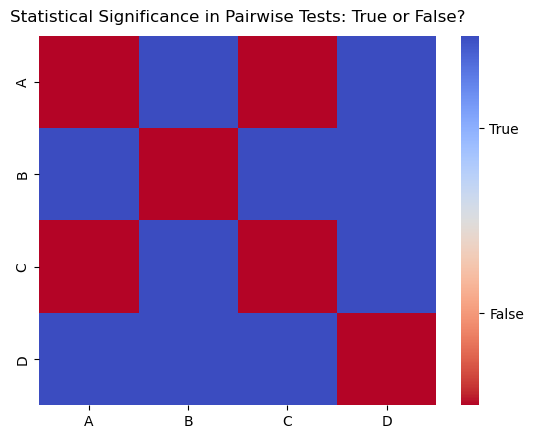

In [163]:
#initiating an empty dictionary
stat_significant_dict = { "A" : [],
                          "B" : [],
                          "C" : [],
                          "D" : []
                         }

#compare each verison to another
for col1 in observed_results.columns:
    for col2 in observed_results.columns:
        #find the p value of each pair
        chisq, pvalue, df, expected = stats.chi2_contingency(observed_results.loc[:, [col1,col2]], correction=False)
        #if the p-value is lower than alpha --> result is statisticslly significant
        stat_significant_dict[col1].append(pvalue < alpha_post_hoc)

# create a dataframe of these results
stat_significant_df =pd.DataFrame(stat_significant_dict, index=observed_results.columns)

# create a heatmap from the dataframe
ax = sns.heatmap(stat_significant_df, cmap="coolwarm_r")

# Manually specify colorbar labelling after it's been generated
colorbar = ax.collections[0].colorbar
colorbar.set_ticks([0.25, 0.75])
colorbar.set_ticklabels(['False', 'True'])

# Add a title to the heatmap
ax.set_title("Statistical Significance in Pairwise Tests: True or False?", pad=10);

In [162]:
stat_significant_df

,A,B,C,D
A,False,True,False,True
B,True,False,True,True
C,False,True,False,True
D,True,True,True,False


Analysing our heatmap, it is evident that the version with the highest click-through rate, `Version_C`, exhibits a statistically significant difference when compared Versions B and D, but not to `Version_A`, which possesses the second-highest click-through rate. As a result, declaring a clear winner based on post hoc tests becomes challenging, therefore we can only say that both `Version_C` and `Version_A` are the winners.

However, if a definitive winner is required, additional steps need to be implemented. This is where we transition from the realm of statistics to the business world. The following actions can help in determining the version to be featured on the website in the future:
 - Consider other metrics alongside click-through rate.
 - Incorporate qualitative research findings.
 - Seek input from subject-matter experts.
 - Redesign the experiment and conduct it once more.